# Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Import dan Baca Gambar

In [3]:
# Baca gambar
img = cv2.imread('Rama Dinantiar.jpg')  # Ganti dengan nama file Anda
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

### Mendeteksi Gambar

In [9]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mendeteksiHijau = cv2.inRange(hsv, np.array([40, 40, 40]), np.array([80, 255, 255]))

mendeteksiBiru = cv2.inRange(hsv, np.array([100, 150, 0]), np.array([140, 255, 255]))

mendeteksiMerah = cv2.bitwise_or(
    cv2.inRange(hsv, np.array([0, 120, 70]), np.array([10, 255, 255])),
    cv2.inRange(hsv, np.array([170, 120, 70]), np.array([180, 255, 255])))

### Menggabungkan dan Masking Warna

In [21]:
# Gabungan warna berdasarkan kategori
mask_none = np.zeros_like(mendeteksiBiru)  # Tidak menampilkan apapun
mask_blue_only = mendeteksiBiru
mask_red_blue = cv2.bitwise_or(mendeteksiBiru, mendeteksiMerah)
mask_all = cv2.bitwise_or(mask_red_blue, mendeteksiHijau)

In [23]:
# Buat dict masker untuk ditampilkan
mask_dict = {
    "NONE": mask_none,
    "BLUE": mask_blue_only,
    "RED-BLUE": mask_red_blue,
    "RED-GREEN-BLUE": mask_all
}

### Visualisasi Hasil

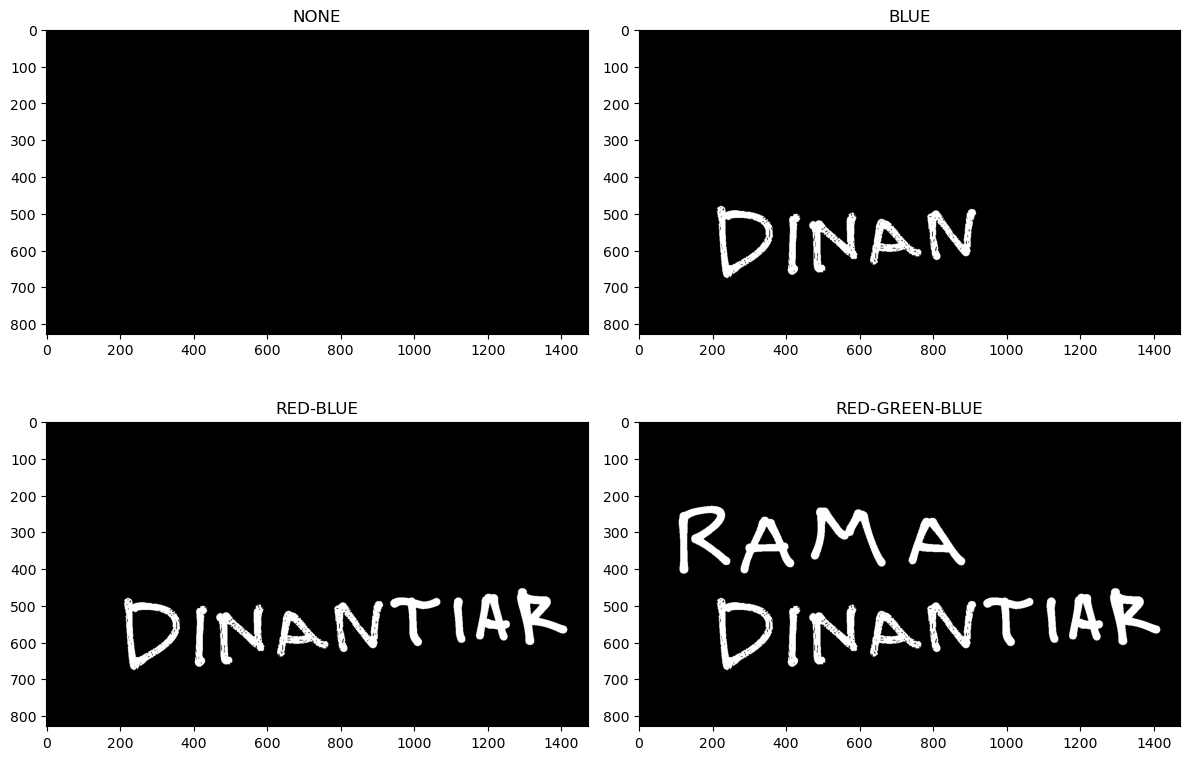

In [101]:
# Tampilkan hasil
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i, (title, mask) in enumerate(mask_dict.items()):
    # Buat teks putih di latar hitam
    output = cv2.merge([mask, mask, mask])  # 3 channel
    output[mask > 0] = [255, 255, 255]      # Putih
    output[mask == 0] = [0, 0, 0]           # Hitam

    axs[i].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axs[i].set_title(title)
    axs[i].axis()

plt.tight_layout()
plt.show()

## Histogram

Ambang batas warna:
Merah 
Hue        : 0-10 dan 170-100 
Saturation : 120-255 
Value      : 70-255

Hijau 
Hue        : 40-80 
Saturation : 40-255 
Value      : 40-255

Biru 
Hue       : 100-140 
Saturation : 150-225 
Value     : 0-255


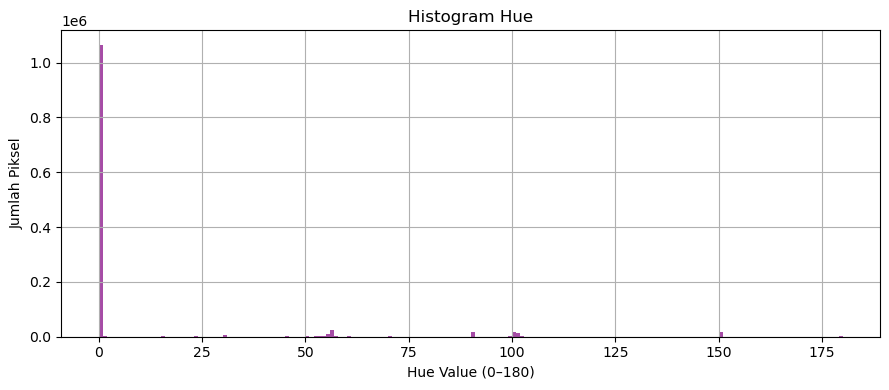

In [93]:
# Konversi gambar ke HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Ambil channel Hue
hue = hsv[:, :, 0]

# Plot histogram Hue
plt.figure(figsize=(9, 4))
plt.hist(hue.ravel(), bins=180, range=[0, 180], color='purple', alpha=0.7)
plt.title("Histogram Hue")
plt.xlabel("Hue Value (0–180)")
plt.ylabel("Jumlah Piksel")
plt.grid(True)

# Tambahkan teks Ambang Batas Warna
print("Ambang batas warna:")
print("Merah \nHue        : 0-10 dan 170-100 \nSaturation : 120-255 \nValue      : 70-255")
print("\nHijau \nHue        : 40-80 \nSaturation : 40-255 \nValue      : 40-255")
print("\nBiru \nHue       : 100-140 \nSaturation : 150-225 \nValue     : 0-255")

plt.tight_layout()
plt.show()